In [2]:
#Sensitivity Plot Data Clicker
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import pandas as pd
import seaborn
import matplotlib
from astropy.io import ascii
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d

font = {'family':'normal', 'weight':'normal', 'size':42}
plt.rc('font', **font)

In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [16]:
#sdes0, sdes1, sdes2, sdes3, sdes4 = ascii.read('sdes_run_2_set_0.csv'), ascii.read('sdes_run_2_set_1.csv'), ascii.read('sdes_run_2_set_2.csv'), ascii.read('sdes_run_2_set_3.csv'), ascii.read('sdes_run_2_set_4.csv')
#sdes5_0, sdes6_0, sdes7_0, sdes8_0, sdes9_0 = ascii.read('sdes_run_2_set_5.csv'), ascii.read('sdes_run_2_set_6.csv'), ascii.read('sdes_run_2_set_7.csv'), ascii.read('sdes_run_2_set_8.csv'), ascii.read('sdes_run_2_set_9.csv')
#sdes5_1, sdes6_1, sdes7_1, sdes8_1, sdes9_1 = ascii.read('sdes_run_2_set_5.csv'), ascii.read('sdes_run_2_set_6.csv'), ascii.read('sdes_run_2_set_7.csv'), ascii.read('sdes_run_2_set_8.csv'), ascii.read('sdes_run_2_set_9.csv')
detec0, detec1, detec2, detec3, detec4 = ascii.read('detections_ownd_KARPA2_set_0.csv'), ascii.read('detections_ownd_KARPA2_set_1.csv'), ascii.read('detections_ownd_KARPA2_set_2.csv'), ascii.read('detections_ownd_KARPA2_set_3.csv'), ascii.read('detections_ownd_KARPA2_set_4.csv')
detec5, detec6, detec7 = ascii.read('detections_ownd_KARPA2_set_5.csv'), ascii.read('detections_ownd_KARPA2_set_6.csv'), ascii.read('detections_ownd_KARPA2_set_7.csv')#, ascii.read('detections_ownd_KARPA2_set_8.csv'), ascii.read('detections_ownd_KARPA2_set_9.csv')

#sdes = [sdes0, sdes1, sdes2, sdes3, sdes4, sdes5, sdes6, sdes7, sdes8, sdes9]
detec = [detec0, detec1, detec2, detec3, detec4, detec5, detec6, detec7]#, detec8, detec9]

#sdes_array = np.zeros((11, 100))
detec_array = np.zeros((11, 100))

for k in range(len(detec)):
    for i in range(11):
        for j in range(10):
            name = 'col' + str(j+1)
            #sdes_array[i, k*10+j] = sdes[k][name][10-i]
            detec_array[i, k*10+j] = detec[k][name][i]

In [17]:
period_space = np.logspace(np.log10(3), np.log10(40), 100)
lin_period_space = np.linspace(3, 40, 10000)

new_detec = np.zeros((11, len(lin_period_space)))
for i in range(len(lin_period_space)):
    idx = np.argmin(abs(period_space - lin_period_space[i]))
    new_detec[:, i] = detec_array[:, idx]


[1.29307262 1.31166769 1.32740198 1.34170588 1.35600978 1.36602251
 1.37889602 1.39033915 1.40607344 1.48188411 1.83805124 1.89383645
 1.85235514 1.91958347 2.07835677 2.26859865 2.36443478 2.46170131
 2.4917395  2.55038549 2.60474031 2.63906967 2.69056372 2.73490581
 2.8221596  2.90798301 2.9952368  3.06961708]
1.2930726209037202


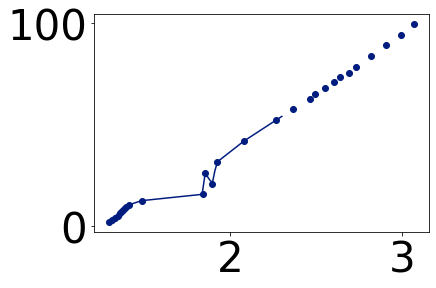

In [18]:
mass_y = np.array([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.055, 0.06, 0.062, 0.065, 0.068, 0.07, 0.072, 0.075, 0.08, 0.085, 0.09, 0.095])
radius_y = [9.04, 9.17, 9.28, 9.38, 9.48, 9.55, 9.64, 9.72, 9.83, 10.36, 12.85, 13.24, 12.95, 13.42, 14.53, 15.86, 16.53, 17.21, 17.42, 17.83, 18.21, 18.45, 18.81, 19.12, 19.73, 20.33, 20.94, 21.46]
Radius_y = np.array([radius_y[i]/(6.9911) for i in range(len(radius_y))])
Mass_y = np.array([mass_y[i]*(1.989*10**30)/(1.898*10**27) for i in range(len(mass_y))])

print(Radius_y)

m_r_relation = interp1d(Radius_y, Mass_y )
print(np.min(Radius_y))
radiusspace = np.linspace(1.4, 2.3, 61)
plt.plot(radiusspace, m_r_relation(radiusspace))
plt.scatter(Radius_y, Mass_y)
plt.show()

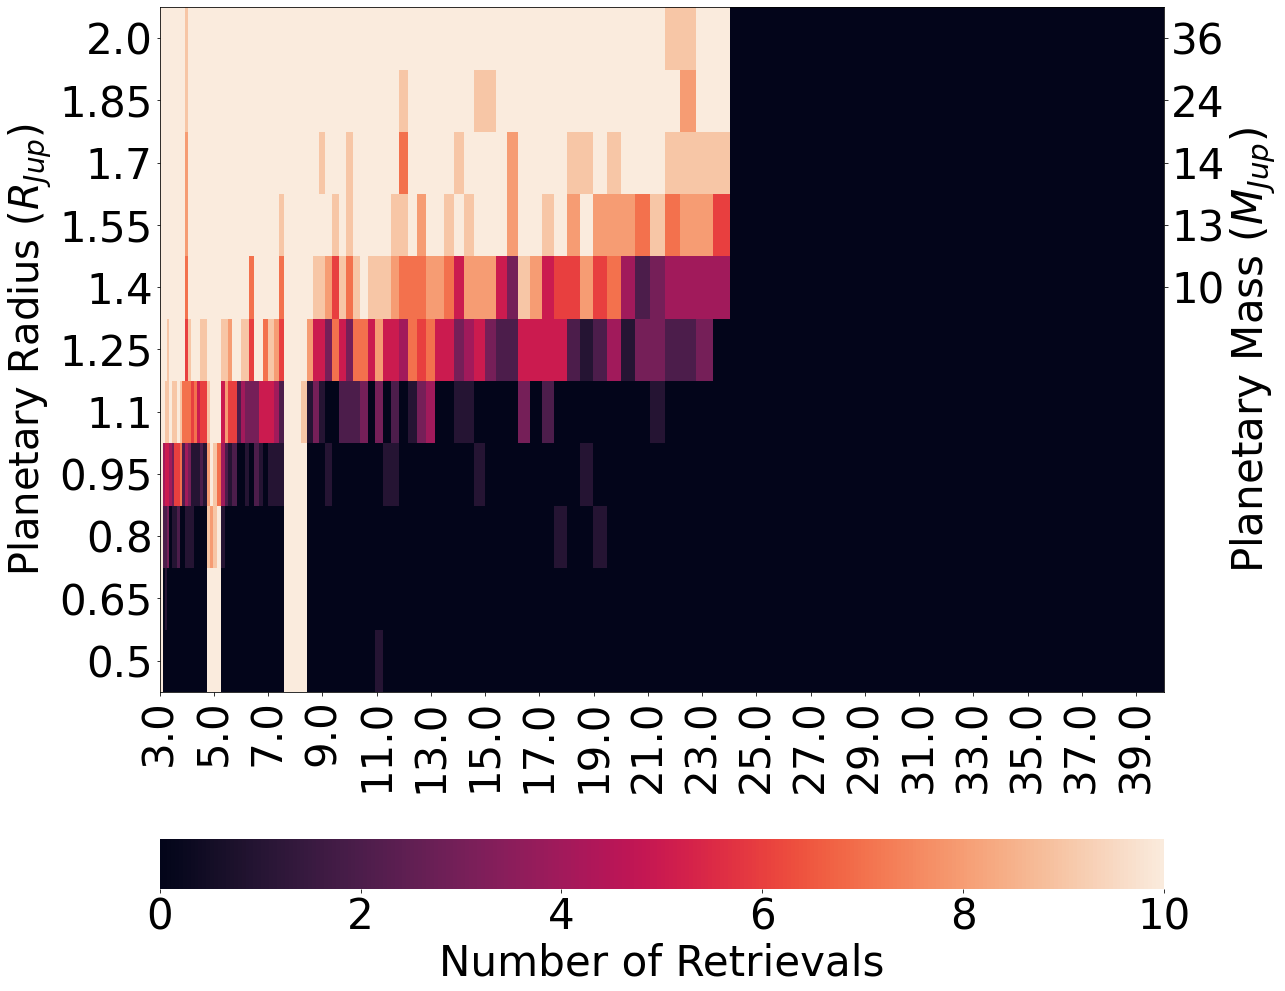

In [19]:
periods = []
for i in range(len(lin_period_space)):
    periods.append('{:.1f}'.format(lin_period_space[i]))
radii = [0.5, 0.65, 0.8, 0.95, 1.1, 1.25, 1.4, 1.55, 1.7, 1.85, 2]

alt_detec = pd.DataFrame(new_detec, index = radii, columns = periods)

ax_detec = seaborn.heatmap(alt_detec, cbar_kws = {'label': 'Number of Retrievals', 'orientation' : 'horizontal'}, xticklabels = 540, yticklabels = 1)

plt.gca().invert_yaxis()
plt.ylabel('Planetary Radius ($R_{Jup}$)', fontsize=40)

ax2 = ax_detec.twinx()
ax2.set_yticks([1/22, 1/22+1/11, 1/22+2/11, 1/22+3/11, 1/22+4/11, 1/22+5/11, 1/22+6/11, 1/22+7/11, 1/22+8/11, 1/22+9/11, 1/22+10/11][-5:])
ax2.set_yticklabels([str(m_r_relation(radiusspace)[i*10])[0:2] for i in range(5)])
ax2.set_ylabel('Planetary Mass ($M_{Jup}$)')

plt.xlabel('Orbital Period (Days)', labelpad=40, fontsize=40)

fig = plt.gcf()
fig.set_size_inches(18, 18)
plt.savefig('j1407_real_results_w_mr_NR.png')
plt.show()